# An introductional notebook to HEP analysis in C++

<p>In this notebook you can find an easy set of commands that show some basic computing techniques commonly used in High Energy Physics (HEP) analyzes.</p>

<p>It also shows how to create an histogram, fill it and draw it. Moreover it is an introduction to [ROOT](https://root.cern.ch/) too. The final output is a plot with the number of leptons.</p>

Based on ATLAS opendata notebooks (http://opendata.atlas.cern/release/2020/documentation/notebooks/intro.html)


The library used is [ROOT](https://root.cern.ch/), a scientific data analysis software framework that provides a large set of functionalities needed to deal with big data processing, statistical analysis, visualisation and storage.

<p>At first we have to include several helpers that will support our analysis:</p>

In [1]:
#include <iostream>
#include <string>
#include <stdio.h>

Next we have to open the data that we want to analyze. As described above the data is stored in a _*.root_ file. This is a root file containing tracks and calorimeter clusters

In [2]:
TFile *file = TFile::Open("Data_13TeV.root"); 

The next step is to define a tree named _tree_ to get the data out of the _*.root_ file. The tree in this root file is called "JetRecoTree". We will then print the contents of the tree to find the names of the variables. 

In [3]:
TTree *tree = (TTree*) file->Get("mini");
tree->Print()

******************************************************************************
*Tree    :mini      : mini                                                   *
*Entries :  9796409 : Total =      9169958260 bytes  File  Size = 1581230017 *
*        :          : Tree compression factor =   5.80                       *
******************************************************************************
*Br    0 :runNumber : runNumber/I                                            *
*Entries :  9796409 : Total  Size=   39192025 bytes  File Size  =     196049 *
*Baskets :       59 : Basket Size=    2097664 bytes  Compression= 199.15     *
*............................................................................*
*Br    1 :eventNumber : eventNumber/I                                        *
*Entries :  9796409 : Total  Size=   39192155 bytes  File Size  =   33515436 *
*Baskets :       59 : Basket Size=    2097664 bytes  Compression=   1.16     *
*...................................................

Activate variables 

In [4]:

Bool_t e_trig;
Bool_t mu_trig;
UInt_t lep_n;
UInt_t jet_n;
Float_t MET;
Float_t MET_phi;

vector<Float_t> *lep_pt;  
vector<Float_t> *lep_eta;  
vector<Float_t> *lep_phi;  
vector<Float_t> *lep_E;  
vector<Int_t> *lep_type;  
vector<Bool_t> *lep_isTight;  
vector<Float_t> *lep_ptcone30;
vector<Float_t> *lep_etcone20;

vector<Float_t> *jet_pt;  


tree->SetBranchAddress("trigE", &e_trig);
tree->SetBranchAddress("trigM", &mu_trig);
tree->SetBranchAddress("lep_n", &lep_n);
tree->SetBranchAddress("jet_n", &jet_n);
tree->SetBranchAddress("met_et", &MET);
tree->SetBranchAddress("met_phi", &MET_phi);

tree->SetBranchAddress("lep_pt", &lep_pt);
tree->SetBranchAddress("lep_eta", &lep_eta);
tree->SetBranchAddress("lep_phi", &lep_phi);
tree->SetBranchAddress("lep_E", &lep_E);
tree->SetBranchAddress("lep_type", &lep_type);
tree->SetBranchAddress("lep_isTightID", &lep_isTight);
tree->SetBranchAddress("lep_ptcone30", &lep_ptcone30);
tree->SetBranchAddress("lep_etcone20", &lep_etcone20);

tree->SetBranchAddress("jet_pt", &jet_pt);


Create Canvas

In [5]:
TCanvas *canvas = new TCanvas("Canvas","",800,600);

Create histograms: Leading jet pT and all jets pT 

In [6]:
TH1F *cutflow_mu = new TH1F("Cutflow-mu","Muons; Cut; Events",10,0,10);

TH1F *hist_njets = new TH1F("Number of jets","n-jets; Jet multiplicity; Events",10,0,10);


Loop and fill histograms

In [8]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

int cut1 = 0;
int cut2 = 0;

int cut3mu = 0;
int cut4mu = 0;
int cut5mu = 0;
int cut6mu = 0;
int cut7mu = 0;
int cut8mu = 0;



for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);   

    //First cut: All events
    cut1++;
    cutflow_mu->Fill(1);
 
    
    //Second cut: Trigger
    if(!e_trig && !mu_trig) continue;
    cut2++;
    cutflow_mu->Fill(2);
 
        
    // Preselection of good leptons                                                                                
    int n_mu=0;
    
    //Loop over leptons
    for(unsigned int i=0; i<lep_n; i++){
        if( !lep_isTight->at(i)) continue;
        if( lep_pt->at(i) < 30000.) continue; 
        if( lep_ptcone30->at(i)/lep_pt->at(i) > 0.15 ) continue; 
        if( lep_etcone20->at(i)/lep_pt->at(i) > 0.15 ) continue;  
        if( lep_type->at(i)==13 && TMath::Abs(lep_eta->at(i)) < 2.5 ){
                n_mu++;}
        /*
        To complete: Add electrons and extract the index for the good lepton in each case
        */
  }
    
     //Using the index found, find the lepton and fill the cutflow histogram depending on the lepton type (electron or muon)
    //Example:
    //Third cut (one good lepton):
    //   if(lep_type->at(lep_index)==13 ) {cutflow_mu->Fill(3); cut3mu++;}

    
    int n_jets=0;
    int n_bjets=0;
   
    //Number of jets distribution
    hist_njets->Fill(jet_n);
   
    
    //Fourth cut: At least 4 jets
    if(jet_n<4) continue; 
    //if(lep_type->at(lep_index)==13) {cutflow_mu->Fill(4); cut4mu++;}

    
    for(unsigned int j=0; j<jet_n; j++){
        // To complete: apply jet cuts to find the good jets
        if(jet_pt->at(j) < 30000.) continue;
        // JVF cleaning                                                                                    
        // Eta cut
        // JVT cleaning                                                                                    
        // cut on MV2 and count the number of b-jets
       }
    
    //Fifth cut: At least 4 good jets
    if(n_jets<4) continue; 
    //if(lep_type->at(lep_index)==13) {cutflow_mu->Fill(5); cut5mu++;}
    
    //Sixth cut: at least one b-jet
    if(n_bjets==0) continue;
    
    //Seventh cut: MET > 30 GeV
    if(MET<30000.) continue;
  
    
    // TLorentzVector definitions                                                               
    TLorentzVector Lepton  = TLorentzVector();
    TLorentzVector  MeT  = TLorentzVector();
   
    //To complete: Lorentz vectors for the lepton and MET. Use SetPtEtaPhiE().

    
    //Calculation of the mTW using TLorentz vectors             
    // float mTW = sqrt(2*Lepton.Pt()*MeT.Et()*(1-cos(Lepton.DeltaPhi(MeT))));

    //Eight cut: mTW > 30 GeV

    
}

std::cout << "Done!" << std::endl;
std::cout << "All events:" << nentries << std::endl;
std::cout << "Cut1:" << cut1 << std::endl;
std::cout << "Cut2:" << cut2 << std::endl;
std::cout << "Cut3-mu:" << cut3mu << std::endl;
std::cout << "Cut4-mu:" << cut4mu << std::endl;
std::cout << "Cut5-mu:" << cut5mu << std::endl;
std::cout << "Cut6-mu:" << cut6mu << std::endl;
std::cout << "Cut7-mu:" << cut7mu << std::endl;
std::cout << "Cut8-mu:" << cut8mu << std::endl;



Done!
All events:9796409
Cut1:9796409
Cut2:9796409
Cut3-mu:0
Cut4-mu:0
Cut5-mu:0
Cut6-mu:0
Cut7-mu:0
Cut8-mu:0


<p>Draw</p>

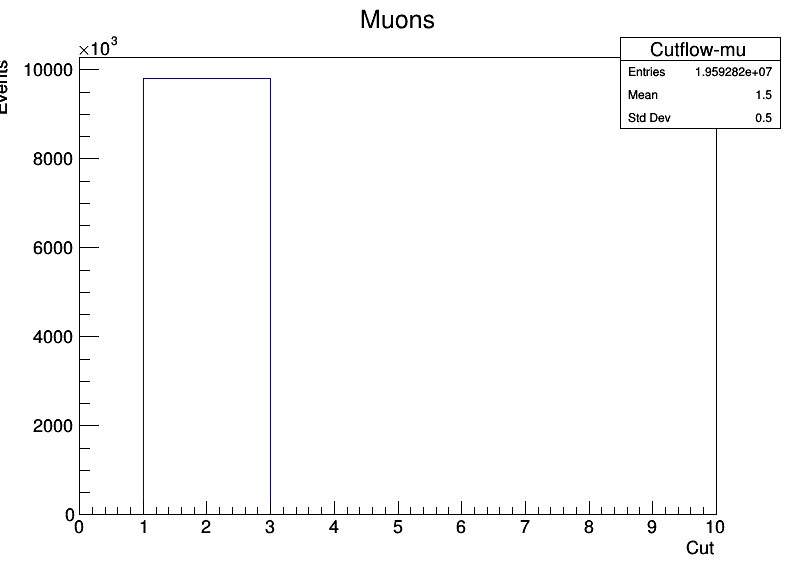

In [9]:
cutflow_mu->Draw("");
canvas->Draw();

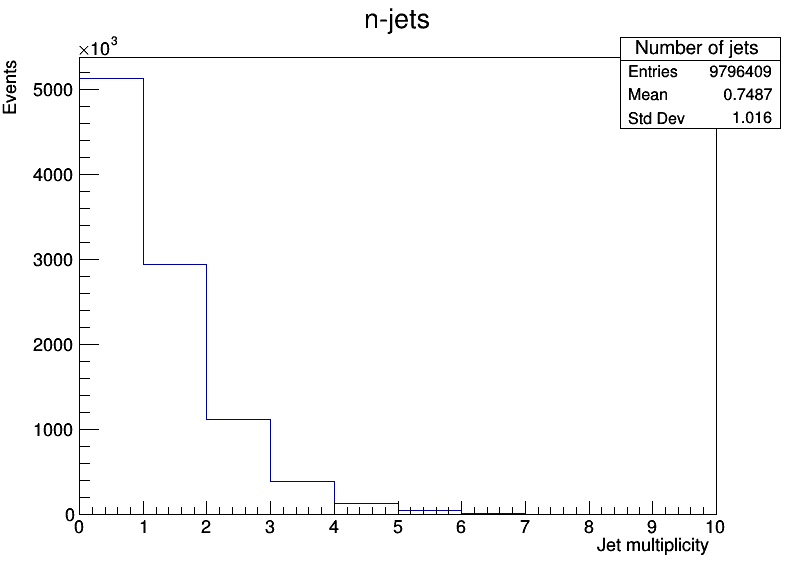

In [10]:
hist_njets->Draw();
canvas->Draw();